In [13]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script> so much code! click <a href="javascript:code_toggle()">here</a>.''')

In [14]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pandas as pd
import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import pickle
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

#from matplotlib import reload
import arrow
import gsw
import time

%matplotlib inline

plt.rcParams.update({'font.size': 20,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 20})

In [15]:
target_year = 2050
scen = '2_4pt5'
ymd = 'y2017m01d01'

#f = nc.Dataset(f'./JdF_future_DIC/LO_TY_{target_year}_scen_{scen}_{ymd}_DIC_PacellaSurf.nc','w', format='NETCDF4') #'w' stands for write

fdeep =  nc.Dataset('./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_y2017m01d01_DIC_nosurfnodeep.nc')
fsurf =  nc.Dataset('./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_y2017m01d01_DIC_PacellaSurf.nc')
# LO_TY_2050_scen_2_4pt5_y2017m12d31_DIC_PacellaSurf.nc

print(fsurf['preindustrial_DIC'])

print(fdeep['preindustrial_DIC'])

presday = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc')
    

<class 'netCDF4._netCDF4.Group'>
group /preindustrial_DIC:
    dimensions(sizes): xval(950), depth(1)
    variables(dimensions): float32 DIC_intrusion(depth,xval)
    groups: 

<class 'netCDF4._netCDF4.Group'>
group /preindustrial_DIC:
    dimensions(sizes): xval(950), depth(40), single(1)
    variables(dimensions): float32 sigma0(depth,xval), float32 water_age(depth,xval), float32 target_year(single), float32 AOU_stoich(depth,xval), float32 obsyear_pref_pco2(depth,xval), float32 targetyear_pref_pco2(depth,xval), float32 obsyear_pref_dic(depth,xval), float32 targetyear_pref_dic(depth,xval), float32 final_target_DIC(depth,xval)
    groups: 



In [16]:
start ='2017-01-01'
end ='2017-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

In [17]:
newCAR_DIC = np.zeros([365,40,950])
newCAR_sigma0 = np.zeros([365,40,950])
for i in range(0,1):

    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'

#     if i%60 == 0:
        #print(ymd)
    newCAR = nc.Dataset(f'./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_nosurfnodeep.nc')
   # print(newCAR)
    newCAR_DIC[i,:,:] = newCAR['preindustrial_DIC']['final_target_DIC'][:,:] 
    newCAR_sigma0[i,:,:] = newCAR['preindustrial_DIC']['sigma0'][:,:] 
    newCAR.close()

In [18]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = w['gdept_1d'][0,:]

In [19]:
test_DIC = (newCAR_DIC[0,:,200])
test_sigma = newCAR_sigma0[0,:,200]
test_surfint = fsurf['preindustrial_DIC']['DIC_intrusion'][0,200]
presday_DIC = presday['DIC'][0,:,0,200]




print('present-day DIC:')
print(presday_DIC)
print('test surface intrusion')
print(test_surfint)
print('intrusion (2050 DIC - present-day DIC):')
intr = test_DIC-presday_DIC
intr[intr > 3000] = np.nan
print(intr)



present-day DIC:
[2073.42191446 2073.53044709 2074.35632189 2074.80450841 2075.30230533
 2075.97217841 2076.90431307 2078.00994637 2079.091462   2080.15256918
 2081.23370389 2082.33381313 2083.31135646 2084.23676319 2085.17543902
 2086.14977372 2087.23220447 2088.49412667 2090.00728044 2092.01586619
 2095.1052878  2110.23358038 2121.81385195 2137.03919739 2177.04895854
 2206.79027819 2236.14774234 2255.04322935 2265.11551916 2273.51686283
 2282.52541014 2289.89831815 2291.43705912 2294.16642653 2297.80097147
 2297.80097147 2297.80097147 2297.80097147 2297.80097147 2297.80097147]
test surface intrusion
31.32
intrusion (2050 DIC - present-day DIC):
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 26.61998677 27.42627454 27.80342953 27.98753236 27.2

In [25]:
### sigma 365 x 950 x 40
### pres-day dic 
### forward car50 dic
### 

big_sigma = np.zeros([365,40,950])
big_presdayDIC = np.zeros([365,40,950])
big_forwardDIC = np.zeros([365,40,950])
big_surfintr = np.zeros([365,950])

for i in range(0,365):
    if (i%60 == 0):
        print(i)
    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'

#     if i%60 == 0:
        #print(ymd)
    newCAR = nc.Dataset(f'./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_nosurfnodeep.nc')
   # print(newCAR)
    big_forwardDIC[i,:,:] = newCAR['preindustrial_DIC']['final_target_DIC'][:,:] 
    big_sigma[i,:,:] = newCAR['preindustrial_DIC']['sigma0'][:,:] 
    presday = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc')
    big_presdayDIC[i,:,:] = presday['DIC'][0,:,0,:]
    fsurf =  nc.Dataset(f'./JdF_future_DIC/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_PacellaSurf.nc')
    big_surfintr[i,:] = fsurf['preindustrial_DIC']['DIC_intrusion'][0,:]

    
    newCAR.close()
    presday.close()
    fsurf.close()
    
big_gruberintr = big_forwardDIC - big_presdayDIC 

big_gruberintr[big_gruberintr > 3000 ] = np.nan 

0
60
120
180
240
300
360


In [21]:

def toy_interpolator(sigma0_prof, surf_intr, gruber_intr, verbose = True):
    
#tp testprof
#     presday_DIC_tp = presday_dic_prof
#     newCAR_DIC_tp = CAR_dic_prof
    newCAR_sigma0_tp = sigma0_prof
    
#     print(newCAR_sigma0_tp)

    min_over25 = (np.min(newCAR_sigma0_tp[newCAR_sigma0_tp>25]))
    loc_min_over25 = (np.where(newCAR_sigma0_tp == min_over25))
    intrusion_at_min = gruber_intr[loc_min_over25] 

    # print(intrusion_at_min)

    #
    diff = surf_intr - intrusion_at_min
    depth_way = depths/depths[loc_min_over25]


    shallows = np.zeros_like(newCAR_sigma0_tp)
    shallows = surf_intr - (depth_way) * (diff)
   # print(shallows)
#     #print(surf_intr[22])

    new_intr = np.copy(gruber_intr)
    #print(loc_min_over25[0][0])
    new_intr[0:loc_min_over25[0][0]] = \
    shallows[0:loc_min_over25[0][0]]
    
    if verbose: 
        print('this is surface intr')
        print(surf_intr)
        print('this is gruber intr')
        print(gruber_intr)
        print('this is combined intr')
        print(new_intr)
        
        
    wherereal = np.where(~np.isnan(new_intr))
    endofreal = (np.max(wherereal))
    new_intr[endofreal:40] = new_intr[endofreal]

    if verbose:
        plt.plot(depths,new_intr)
        
        
    
    return new_intr




this is surface intr
31.32
this is gruber intr
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 26.61998677 27.42627454 27.80342953 27.98753236 27.29390467 27.61863522
 26.45798829 24.26525606 23.30976705 22.90657152 20.632134           nan
         nan         nan         nan         nan]
this is combined intr
[31.27981786 31.19945401 31.11908971 31.03872456 30.95835773 30.87798765
 30.79761122 30.71722242 30.63680955 30.55634979 30.4757987  30.39506975
 30.31399446 30.23224494 30.14918351 30.06357172 29.97301108 29.87288113
 29.75437287 29.60102352 29.38321576 29.05134145 28.53252653 27.74239405
 26.61998677 27.42627454 27.80342953 27.98753236 27.29390467 27.61863522
 26.45798829 24.26525606 23.30976705 22.90657152 20.632134           nan
     

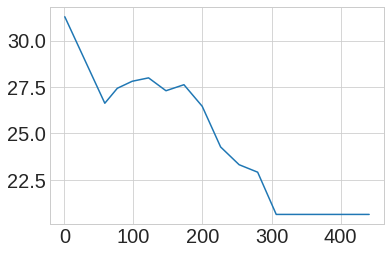

In [22]:
new_intr = toy_interpolator(test_sigma, test_surfint, intr, verbose = False)

new_intr = toy_interpolator(test_sigma, test_surfint, intr, verbose = True)



In [26]:
big_combinedintr = np.zeros([365,40,950])
# big_sigma = np.zeros([365,40,950])
# big_presdayDIC = np.zeros([365,40,950])
# big_forwardDIC = np.zeros([365,40,950])
# big_surfintr = np.zeros([365,950])

for d in range(0,365):
    
    if (d%30 == 0): 
        print(d)
    for x in range(0,950):
        
        test_sigma = big_sigma[d,:,x]
        intr = big_gruberintr[d,:,x]
        test_surfint = big_surfintr[d,x]
        new_intr = toy_interpolator(test_sigma, test_surfint, intr, verbose = False)
        big_combinedintr[d,:,x] = new_intr
        
    
# big_gruberintr[0,:,250]



0
30
60
90
120
150
180
210
240
270
300
330
360


In [27]:
pickle.dump(big_combinedintr, open("co2_2050_ssp245_finalintr.pkl", 'wb'))

In [30]:
big_futuredic = big_presdayDIC + big_combinedintr

0
30
60
90
120
150
180
210
240
270
300
330
360


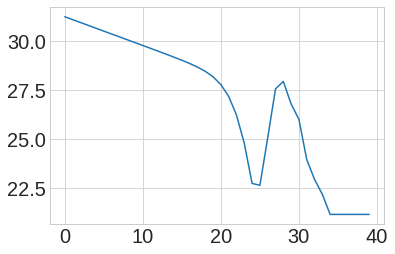

In [32]:
for i in range(0,365):

    if i%30 == 0:
        print(i)
    
    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'
    
    #input file
    test_LO = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}.nc')
    #print(test_LO)
    #input file for preindustrial DIC
    dsin = test_LO 
    #output filename
    ncname = f'./JdF_future_DIC/CAR50_SSP245_v201905_{ymd}.nc'

    dsout = nc.Dataset(ncname, "w", format="NETCDF4")
    #Copy dimensions
    for dname, the_dim in dsin.dimensions.items():
        #print(dname)
        #print(len(the_dim))
        dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
        
    # Copy variables
    for v_name, varin in dsin.variables.items():
        #print(v_name)
        #if (v_name != 'DIC'):
        outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
        # Copy variable attributes
        outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})

        outVar[:] = varin[:]
    
    # copy new DIC variables
    
    t_DIC = np.zeros([1, 40, 1, 950])
    t_DIC[0,:,0,:] = big_futuredic[i,:,:]    
    dsout['DIC'][:] = t_DIC

    dsout.close()
    
plt.plot(big_combinedintr[d,:,x])